In [1]:
2. What is the difference between Label Encoding and One-hot Encoding?

Label Encoding: Converts categories into integer values (e.g., Red=0, Blue=1, Green=2).

Pros: Simple, no increase in dimensionality.

Cons: Implies ordinal relationship (0 < 1 < 2), which may not be true.

One-hot Encoding: Creates binary columns for each category (e.g., Red → [1,0,0], Blue → [0,1,0], Green → [0,0,1]).

Pros: No ordinal assumption.

Cons: Increases dimensionality (curse of dimensionality for large categories).

SyntaxError: invalid character '→' (U+2192) (3562896495.py, line 9)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv(r"C:\Users\sidduling\Downloads\Copy of heart_disease.csv")

In [4]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,FALSE,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,FALSE,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,FALSE,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,FALSE,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,TRUE,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,Male,asymptomatic,125,0,False,normal,120,FALSE,1.5,upsloping,normal,4
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,TRUE,3.0,flat,fixed defect,4
905,56,Male,non-anginal,170,0,False,lv hypertrophy,123,TRUE,2.5,downsloping,fixed defect,4
906,56,Male,non-anginal,144,208,True,st-t abnormality,105,TURE,NaN,downsloping,normal,4


In [5]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,FALSE,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,FALSE,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,FALSE,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,FALSE,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,TRUE,1.5,flat,fixed defect,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB


In [7]:
df.describe()

,age,trestbps,chol,thalch,oldpeak,num
count,908.000000,908.000000,908.000000,908.000000,846.000000,908.000000
mean,53.791850,133.430617,201.484581,135.957048,0.891253,1.008811
std,9.158031,20.401608,112.097949,26.804929,1.093875,1.144436
min,29.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.750000,120.000000,176.750000,118.000000,0.000000,0.000000
50%,54.000000,130.000000,224.000000,138.000000,0.500000,1.000000
75%,60.000000,144.000000,270.000000,156.000000,1.500000,2.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,4.000000


In [8]:
df.isnull()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,False,False,False,False,False,False,False,False,False,False,False,False,False
904,False,False,False,False,False,False,False,False,False,False,False,False,False
905,False,False,False,False,False,False,False,False,False,False,False,False,False
906,False,False,False,False,False,False,False,False,False,True,False,False,False


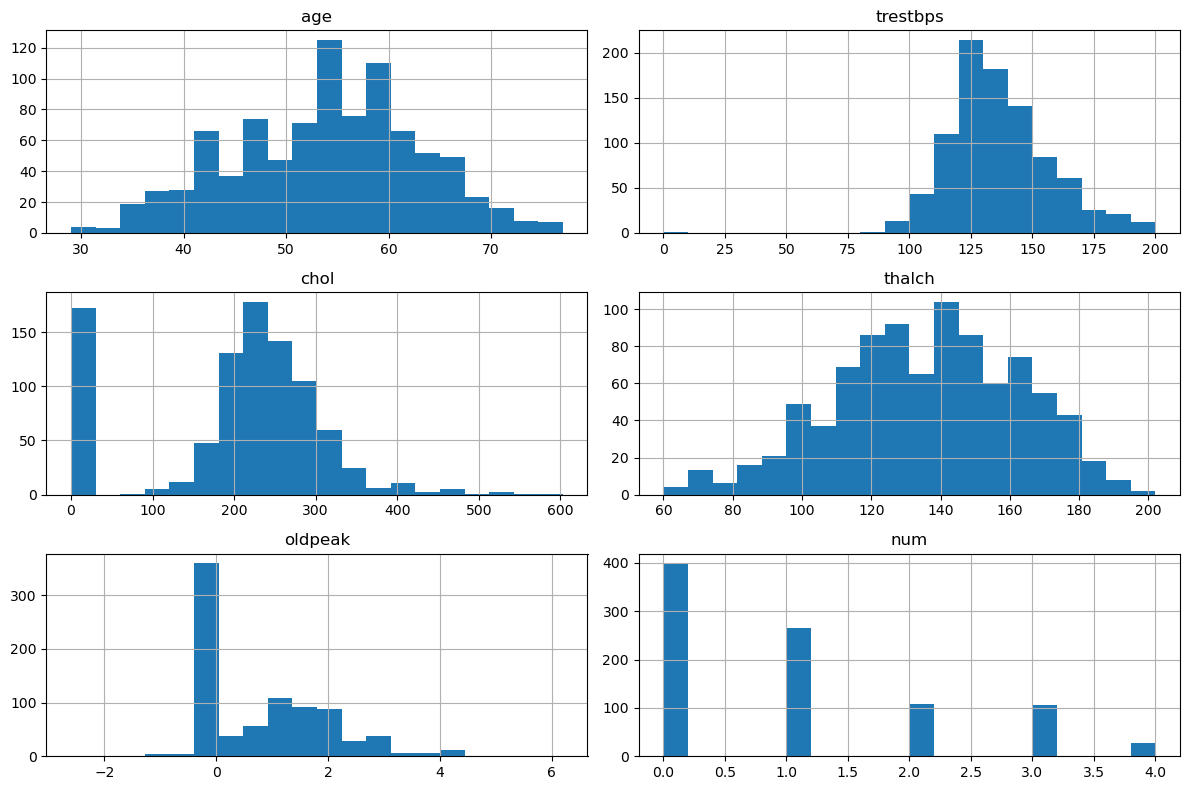

In [9]:
# Visualize distributions
df.hist(bins=20, figsize=(12, 8))
plt.tight_layout()
plt.show()

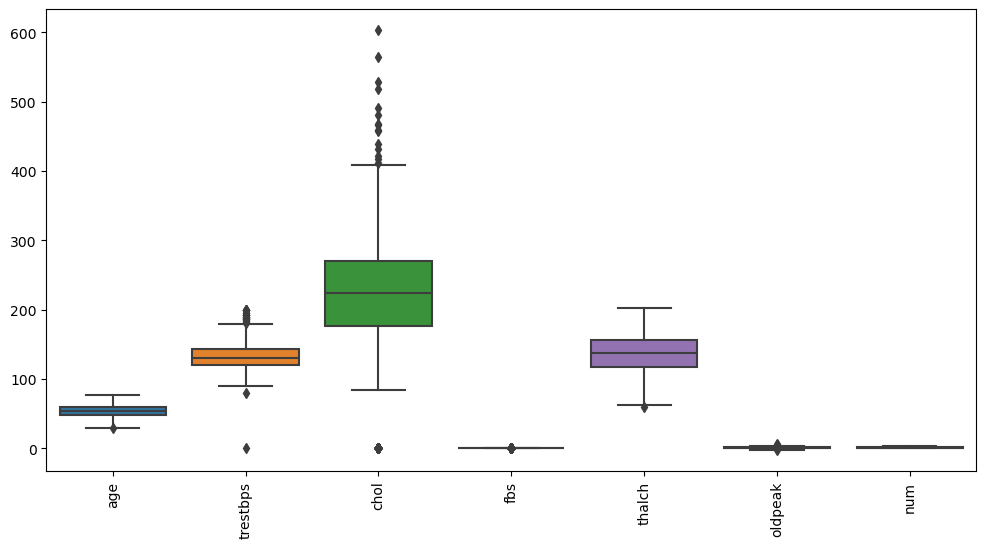

In [10]:
# Boxplot for outlier detection
plt.figure(figsize=(12, 6))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()

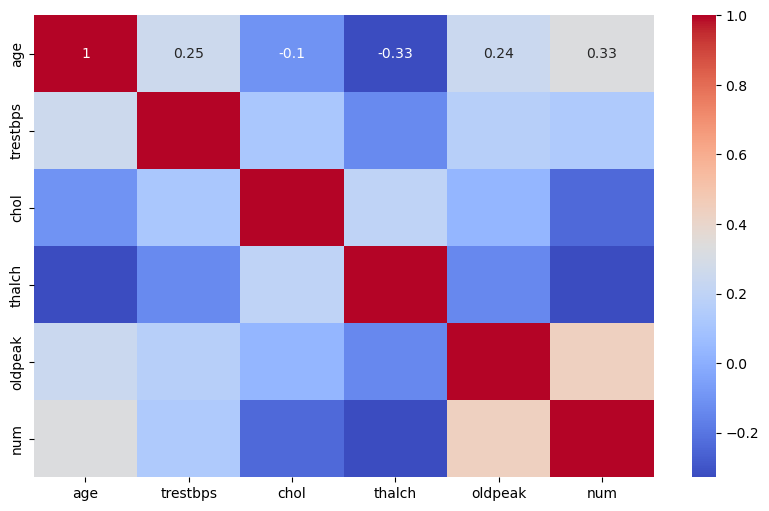

In [11]:
# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.select_dtypes(include=np.number).corr(), annot=True, cmap="coolwarm")
plt.show()

In [12]:
from sklearn.preprocessing import LabelEncoder

In [13]:
for col in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))

In [14]:
le

LabelEncoder()

In [15]:
df.fillna(df.mean(), inplace=True)

In [16]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,1,3,145,233,True,0,150,0,2.300000,0,0,0
1,41,1,1,135,203,False,1,132,0,0.000000,1,0,0
2,57,1,0,140,192,False,1,148,0,0.400000,1,0,0
3,52,1,3,118,186,False,0,190,0,0.000000,1,0,0
4,57,1,0,110,201,False,1,126,1,1.500000,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,1,0,125,0,False,1,120,0,1.500000,2,1,4
904,62,1,0,166,170,False,2,120,1,3.000000,1,0,4
905,56,1,2,170,0,False,0,123,1,2.500000,0,0,4
906,56,1,2,144,208,True,2,105,2,0.891253,0,1,4


In [17]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report
from sklearn import tree

In [18]:
X = df.drop("num", axis=1)
y = df["num"]

In [19]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal
0,63,1,3,145,233,True,0,150,0,2.300000,0,0
1,41,1,1,135,203,False,1,132,0,0.000000,1,0
2,57,1,0,140,192,False,1,148,0,0.400000,1,0
3,52,1,3,118,186,False,0,190,0,0.000000,1,0
4,57,1,0,110,201,False,1,126,1,1.500000,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,1,0,125,0,False,1,120,0,1.500000,2,1
904,62,1,0,166,170,False,2,120,1,3.000000,1,0
905,56,1,2,170,0,False,0,123,1,2.500000,0,0
906,56,1,2,144,208,True,2,105,2,0.891253,0,1


In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [21]:
# Train Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [22]:
y_pred = dt.predict(X_test)

In [23]:
y_pred

array([1, 1, 0, 2, 1, 0, 1, 0, 2, 1, 3, 1, 0, 0, 0, 2, 0, 0, 0, 3, 0, 1,
       1, 1, 0, 2, 0, 0, 0, 0, 0, 1, 0, 2, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       2, 2, 0, 0, 0, 1, 2, 3, 0, 3, 0, 0, 3, 1, 1, 2, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 3, 3, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       3, 2, 1, 3, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 1, 1, 0, 2, 1, 1, 2, 2,
       0, 0, 2, 0, 0, 0, 0, 1, 2, 0, 3, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       2, 1, 1, 0, 2, 0, 2, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       2, 1, 1, 0, 0, 0, 1, 3, 0, 0, 0, 0, 3, 1, 2, 0, 0, 1, 0, 2, 0, 4,
       2, 1, 4, 2, 0, 0], dtype=int64)

In [24]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.532967032967033


In [25]:
print("Precision:", precision_score(y_test, y_pred, average='weighted'))

Precision: 0.5053228021978022


In [26]:
print("Recall:", recall_score(y_test, y_pred, average='weighted'))

Recall: 0.532967032967033


In [27]:
print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))

F1 Score: 0.5181276602565957


In [28]:
if len(np.unique(y)) == 2:
    print("ROC-AUC:", roc_auc_score(y_test, dt.predict_proba(X_test)[:, 1]))

In [30]:
len

<function len(obj, /)>

In [29]:
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.78      0.75        89
           1       0.33      0.33      0.33        48
           2       0.42      0.45      0.43        22
           3       0.17      0.12      0.14        17
           4       0.00      0.00      0.00         6

    accuracy                           0.53       182
   macro avg       0.33      0.34      0.33       182
weighted avg       0.51      0.53      0.52       182



In [31]:
from sklearn.model_selection import GridSearchCV

In [32]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [33]:
param_grid

{'criterion': ['gini', 'entropy'],
 'max_depth': [3, 5, 7, 10, None],
 'min_samples_split': [2, 5, 10],
 'min_samples_leaf': [1, 2, 4]}

In [34]:
grid = GridSearchCV(DecisionTreeClassifier(random_state=42),
                    param_grid,
                    cv=5,
                    scoring='accuracy')

In [35]:
grid

,estimator,DecisionTreeC...ndom_state=42)
,param_grid,"{'criterion': ['gini', 'entropy'], 'max_depth': [3, 5, ...], 'min_samples_leaf': [1, 2, ...], 'min_samples_split': [2, 5, ...]}"
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'gini'


In [36]:
grid.fit(X_train, y_train)

,estimator,DecisionTreeC...ndom_state=42)
,param_grid,"{'criterion': ['gini', 'entropy'], 'max_depth': [3, 5, ...], 'min_samples_leaf': [1, 2, ...], 'min_samples_split': [2, 5, ...]}"
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'gini'


In [37]:
print("Best Parameters:", grid.best_params_)

Best Parameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2}


In [38]:
print("Best Score:", grid.best_score_)

Best Score: 0.5344638639584318


In [39]:
best_dt = grid.best_estimator_
y_pred_best = best_dt.predict(X_test)

In [40]:
best_dt

,criterion,'gini'
,splitter,'best'
,max_depth,5
,min_samples_split,2
,min_samples_leaf,4
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [41]:
y_pred_best

array([2, 1, 0, 2, 0, 2, 1, 0, 1, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1,
       1, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 3, 0,
       1, 2, 0, 0, 0, 1, 1, 2, 0, 1, 0, 0, 1, 0, 0, 2, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 2, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 2, 1, 1, 0, 1,
       2, 0, 1, 1, 0, 2, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0,
       1, 1, 0, 0, 2, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 3, 1, 2, 0, 0, 0, 0, 2, 0, 3,
       1, 1, 2, 1, 1, 0], dtype=int64)

In [42]:
print("Tuned Accuracy:", accuracy_score(y_test, y_pred_best))

Tuned Accuracy: 0.5439560439560439


In [43]:
importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': best_dt.feature_importances_
}).sort_values(by='Importance', ascending=False)

In [44]:
importances 

,Feature,Importance
2,cp,0.381152
4,chol,0.170208
0,age,0.157014
8,exang,0.083569
9,oldpeak,0.064334
3,trestbps,0.048822
7,thalch,0.042943
1,sex,0.040354
10,slope,0.011603
5,fbs,0.000000


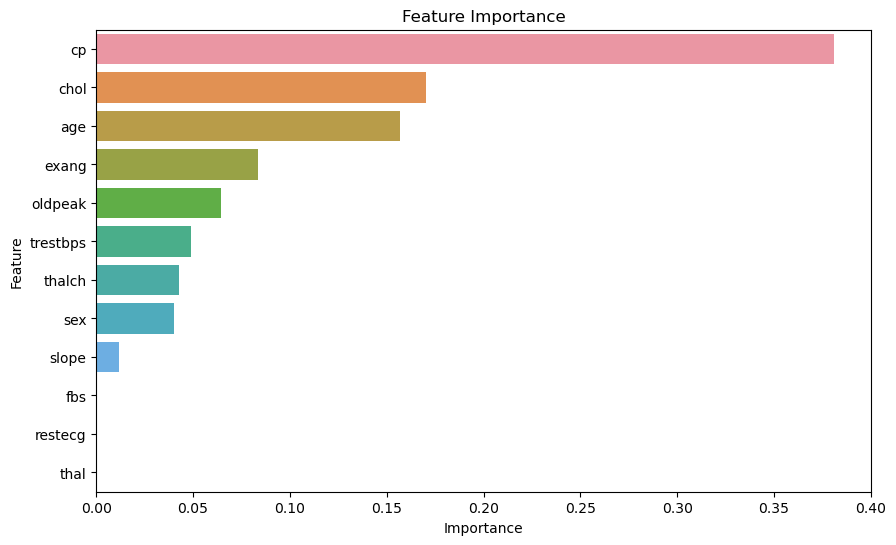

In [45]:
plt.figure(figsize=(10, 6))
sns.barplot(data=importances, x='Importance', y='Feature')
plt.title("Feature Importance")
plt.show()

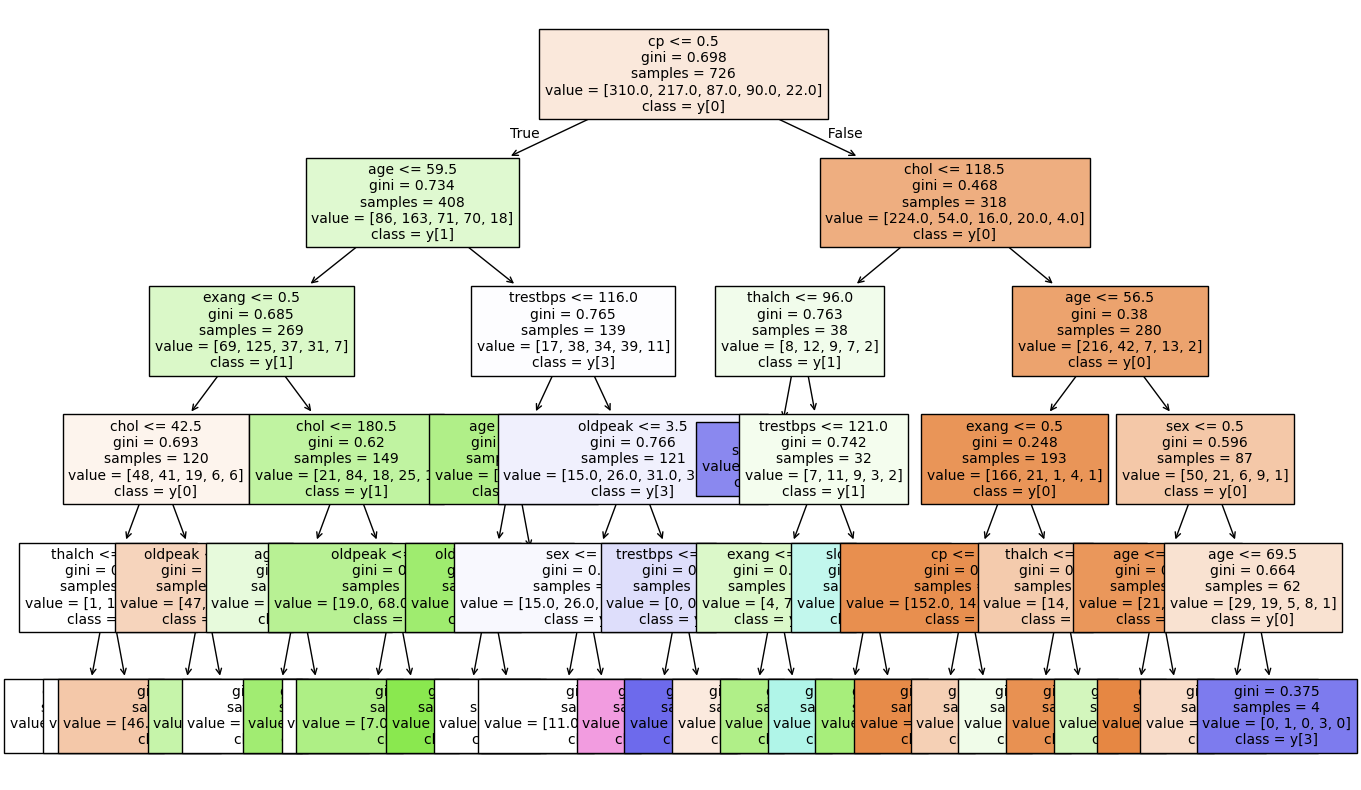

In [46]:
# Visualize Decision Tree
plt.figure(figsize=(16, 10))
tree.plot_tree(best_dt, feature_names=X.columns, class_names=True, filled=True, fontsize=10)
plt.show()

# Interview Questions & Answers

1. What are some common hyperparameters of decision tree models, and how do they affect the model's performance?

max_depth → Limits the depth of the tree. Prevents overfitting by restricting complexity.

min_samples_split → Minimum samples required to split a node. Larger values prevent the tree from creating too many small splits.

min_samples_leaf → Minimum samples required at a leaf node. Helps smooth predictions.

criterion → Function to measure split quality (gini or entropy).

max_features → Number of features considered when splitting. Controls randomness and reduces overfitting.

2. What is the difference between Label Encoding and One-hot Encoding?

Label Encoding: Converts categories into integer values (e.g., Red=0, Blue=1, Green=2).

Pros: Simple, no increase in dimensionality.

Cons: Implies ordinal relationship (0 < 1 < 2), which may not be true.

One-hot Encoding: Creates binary columns for each category (e.g., Red → [1,0,0], Blue → [0,1,0], Green → [0,0,1]).

Pros: No ordinal assumption.

Cons: Increases dimensionality (curse of dimensionality for large categories).